In [ ]:

import yaml
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)  # Print all rows
pd.set_option('display.max_columns', None)  # Print all columns
pd.set_option('display.width', None)  # Allow wide display
pd.set_option('display.max_colwidth', -1) 

with open('/home/zampinojosh/src/hub/twc-flask/storage/db_iching_data.yaml', 'r') as file:
    data = yaml.safe_load(file)


In [ ]:


nd = [
    "",
"Celestial",
"Ground",
"Storm",
"Cascade",
"Rain",
"Mist",
"Shore",
"Delta",
"Gale",
"Swamp",
"Valley",
"Sky",
"Aurora",
"Inferno",
"Plateau",
"Quake",
"Fen",
"Summit",
"Hill",
"Breeze",
"Lightning",
"Volcano",
"Mesa",
"Flood",
"Rapids",
"Peninsula",
"Marsh",
"Lake",
"Lava",
"Ember",
"Gust",
"Bog",
"Gush",
"Peak",
"Ridge",
"Crest",
"Blaze",
"Ripple",
"Fen",
"Torrent",
"Rapids",
"Steam",
"Flood",
"Avalanche",
"Canyon",
"Crater",
"Glacier",
"Oasis",
"Tornado",
"Tsunami",
"Desert",
"Jungle",
"Savanna",
"Tundra",
"Volcano",
"Waterfall",
"Dune",
"Fjord",
"Geyser",
"Coral Reef",
"Iceberg",
"Sinkhole",
"Cavern",
"Hurricane",
]

for hexagram in data["hexagrams"]:
    u = hexagram["topTrigram"] -1
    l = hexagram["bottomTrigram"] -1
    data["trigrams"][u]["domain"] = data["trigrams"][u]["images"][0]
    data["trigrams"][l]["domain"] = data["trigrams"][l]["images"][0]
    tt = data["trigrams"][u]["domain"]
    bt = data["trigrams"][l]["domain"]

    print("--------------------")
    print(hexagram["names"][0] + " " + str(hexagram["number"]))
    print(hexagram["domain"] + " " + tt + "/" + bt)



In [59]:
for hexagram in data["hexagrams"]:
        hexagram["decimal"] = int(hexagram["binary"], 2)
        #print(hexagram["decimal"] )

for trigram in data["trigrams"]:
        trigram["decimal"] = int(trigram["binary"],2)
        #print(trigram["decimal"])

tdf = pd.DataFrame(data["trigrams"])
hdf = pd.DataFrame(data["hexagrams"])


layer_names = (
        "trigram_lower",
        "trigram_upper",
        "hexagram_multiplied_c",
        "hexagram_stacked_p",
        "heaxgram_average_c"
        "hexagram_imported"
        "hexagram_ambient"
)

def l_hexagram_char(attr_value, attr_index, attr_ret):
        #print(attr_value )
        lhex = lambda attr_index, attr_value: next((hexagram for hexagram in data["hexagrams"] if hexagram[attr_index] == attr_value), None)
        return lhex(attr_index, attr_value ) [attr_ret]

def f_hexagram(lower, upper, attr ):
        find_hexagram = lambda upper, lower: next((hexagram for hexagram in data["hexagrams"] if hexagram["topTrigram"] == upper and hexagram["bottomTrigram"] == lower), None)
        return find_hexagram(lower, upper)[attr]

size = 40
np.random.seed(369)
trigram_lower = np.random.randint(1, 9, size=(size, size))
trigram_upper = np.random.randint(1, 9, size=(size, size))
hexagram_multiplied = np.multiply(trigram_lower, trigram_upper)-1
hexagram_multiplied_char = np.vectorize(l_hexagram_char)(hexagram_multiplied, "decimal","character")
hexagram_stacked = np.vectorize(f_hexagram)(trigram_lower, trigram_upper, "decimal")
hexagram_stacked_char = np.vectorize(f_hexagram)(trigram_lower, trigram_upper, "character")
hexagram_stacked_xor_multiplied = np.bitwise_xor(hexagram_multiplied, hexagram_stacked)
hexagram_stacked_xor_multiplied_char = np.vectorize(l_hexagram_char)(hexagram_stacked_xor_multiplied, "decimal","character")

print(trigram_lower)
print(trigram_upper)
print(hexagram_multiplied)
#print(hexagram_multiplied_char)
print(hexagram_stacked)
#print(hexagram_stacked_char)
print(hexagram_stacked_xor_multiplied)
#print(hexagram_stacked_xor_multiplied_char)






[[8 7 6 ... 4 7 8]
 [1 6 4 ... 6 7 5]
 [7 6 7 ... 1 5 5]
 ...
 [4 5 6 ... 4 3 1]
 [4 2 1 ... 3 2 3]
 [2 3 3 ... 6 1 5]]
[[5 1 1 ... 5 8 3]
 [6 1 7 ... 4 1 2]
 [2 3 2 ... 3 6 5]
 ...
 [7 3 5 ... 4 8 4]
 [6 2 5 ... 4 2 6]
 [4 7 3 ... 8 4 7]]
[[39  6  5 ... 19 55 23]
 [ 5  5 27 ... 23  6  9]
 [13 17 13 ...  2 29 24]
 ...
 [27 14 29 ... 15 23  3]
 [23  3  4 ... 11  3 17]
 [ 7 20  8 ... 47  3 34]]
[[28 47 55 ... 20 43 25]
 [62 55 21 ... 50 47 32]
 [40 49 40 ... 57 38 36]
 ...
 [21 33 52 ... 18 11 58]
 [22  0 60 ... 10  0 14]
 [ 2 13  9 ... 51 58 37]]
[[59 41 50 ...  7 28 14]
 [59 50 14 ... 37 41 41]
 [37 32 37 ... 59 59 60]
 ...
 [14 47 41 ... 29 28 57]
 [ 1  3 56 ...  1  3 31]
 [ 5 25  1 ... 28 57  7]]


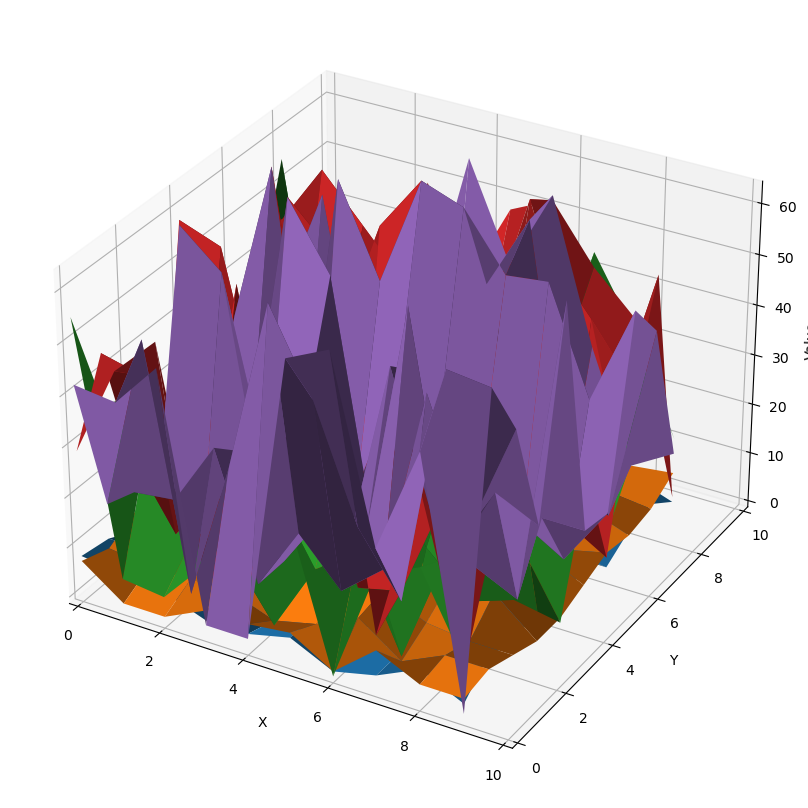

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming trigram_lower, trigram_upper, hexagram_multiplied, hexagram_stacked, hexagram_stacked_xor_multiplied are numpy arrays

# Define the dimensions of the matrices
x_dim, y_dim = trigram_lower.shape

# Create meshgrid for x and y coordinates
x = np.arange(x_dim)
y = np.arange(y_dim)
x, y = np.meshgrid(x, y)

# Create a figure and axis object
#fig = plt.figure()
fig = plt.figure(figsize=(10.24, 10.24))
ax = fig.add_subplot(111, projection='3d')

# Plot each layer as a stacked surface
ax.plot_surface(x, y, trigram_lower, label='Trigram Lower')
ax.plot_surface(x, y, trigram_upper, label='Trigram Upper')
ax.plot_surface(x, y, hexagram_multiplied, label='Hexagram Multiplied')
ax.plot_surface(x, y, hexagram_stacked, label='Hexagram Stacked')
ax.plot_surface(x, y, hexagram_stacked_xor_multiplied, label='Hexagram Stacked XOR Multiplied')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
#ax.legend()
ax.set_xlim(0, x_dim)  # Set maximum limit for the x-axis
ax.set_ylim(0, y_dim)  # Set maximum limit for the y-axis
ax.set_zlim(0, np.max([trigram_lower.max(), trigram_upper.max(), hexagram_multiplied.max(), hexagram_stacked.max(), hexagram_stacked_xor_multiplied.max()])) 
# Show plot
plt.show()

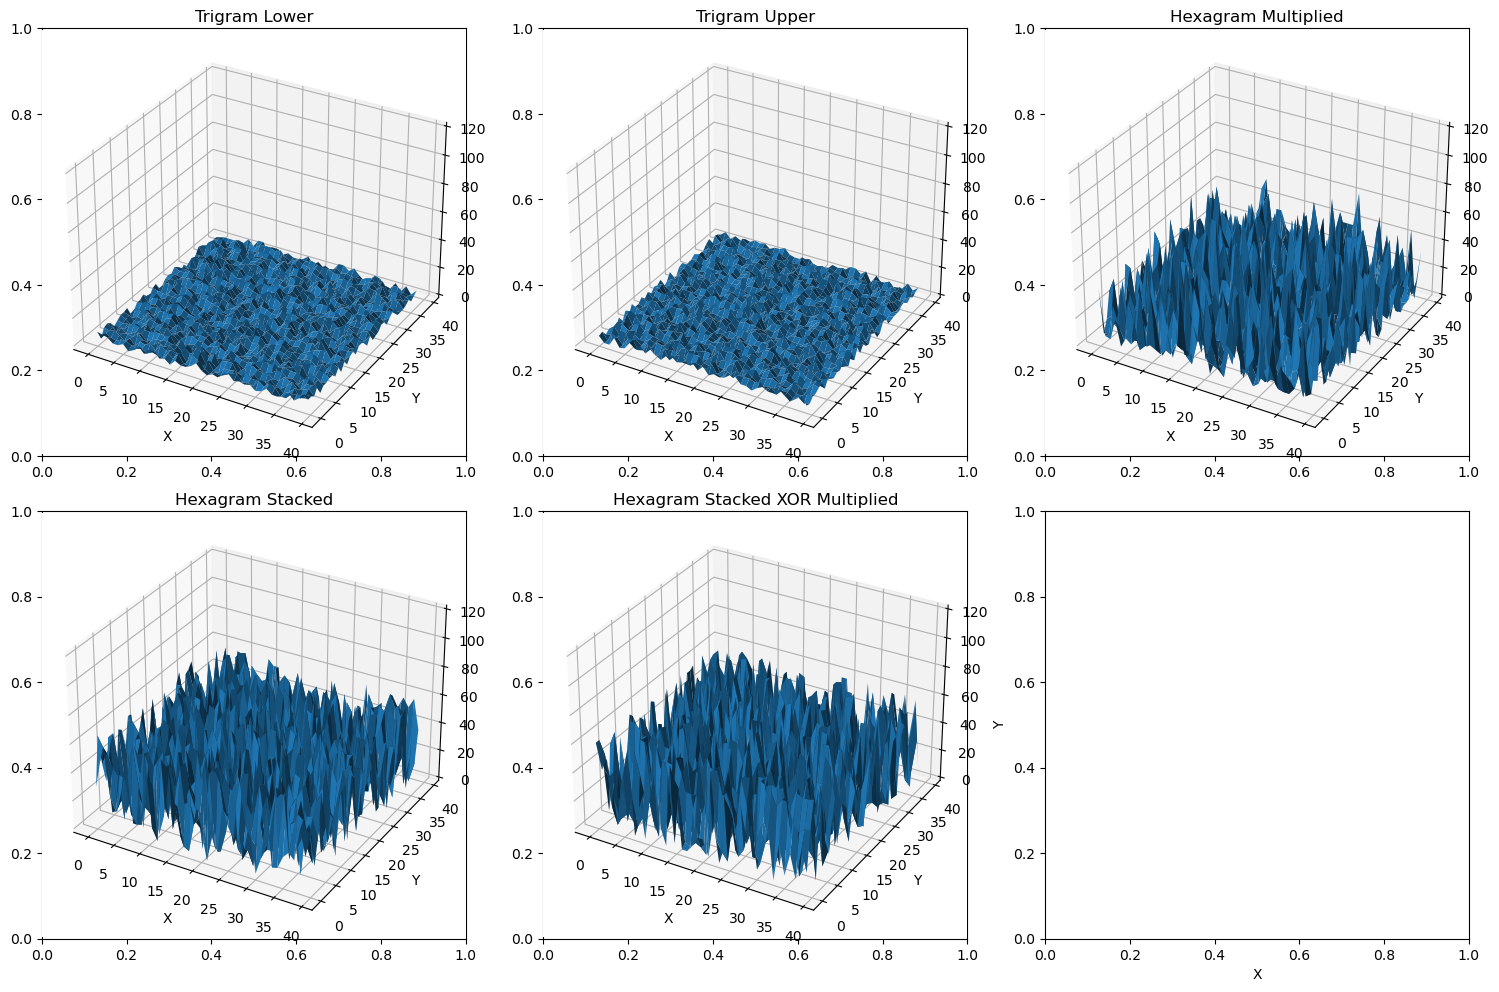

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming trigram_lower, trigram_upper, hexagram_multiplied, hexagram_stacked, hexagram_stacked_xor_multiplied are numpy arrays

# Define the dimensions of the matrices
x_dim, y_dim = trigram_lower.shape

# Create meshgrid for x and y coordinates
x = np.arange(x_dim)
y = np.arange(y_dim)
x, y = np.meshgrid(x, y)

# Set the figure size to 1024x1024 pixels
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot each layer as a stacked surface in separate subplots
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(x, y, trigram_lower, label='Trigram Lower')
        ax.set_zlim(0,120)
        ax.set_title('Trigram Lower')
    elif i == 1:
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(x, y, trigram_upper, label='Trigram Upper')
        ax.set_zlim(0,120)
        ax.set_title('Trigram Upper')
    elif i == 2:
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(x, y, hexagram_multiplied, label='Hexagram Multiplied')
        ax.set_zlim(0,120)
        ax.set_title('Hexagram Multiplied')
    elif i == 3:
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(x, y, hexagram_stacked, label='Hexagram Stacked')
        ax.set_zlim(0,120)
        ax.set_title('Hexagram Stacked')
    elif i == 4:
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(x, y, hexagram_stacked_xor_multiplied, label='Hexagram Stacked XOR Multiplied')
        ax.set_zlim(0,120)
        ax.set_title('Hexagram Stacked XOR Multiplied')

    # Add labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    #ax.set_zlabel('Value')
    #ax.legend()

plt.tight_layout()
plt.show()
